### Created by Yu Qiu

In [1]:
# Basic Python Packages

#import warnings
#warnings.filterwarnings("ignore", category=UserWarning)
#warnings.filterwarnings("ignore", message="deprecated")

# Numpy Library

import numpy as np

# Pandas Library and Settings

import pandas as pd
#pd.set_option("max_columns", None)
pd.options.display.max_colwidth = 100
#warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

# SciPy

from scipy.stats import shapiro
from scipy.stats import ks_2samp

# Visualization Libraries (Matplotlib, Seaborn)

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp

# Sklearn Methods

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#read the dataset
df = pd.read_csv('/Users/qiuyu/Desktop/ALY6140/M2/Capstone/BankChurners.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
df=df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis =1)

In [5]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [6]:
contact = df[df['Contacts_Count_12_mon']==6]

In [7]:
contact.describe()

Customer_Age  Dependent_count  Months_on_book  \
count      54.00000        54.000000       54.000000   
mean       45.12963         2.574074       35.018519   
std         7.47334         1.461478        7.579741   
min        30.00000         0.000000       15.000000   
25%        40.00000         2.000000       31.000000   
50%        45.00000         3.000000       36.000000   
75%        48.00000         4.000000       37.750000   
max        62.00000         5.000000       54.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                 54.000000               54.000000   
mean                   3.314815                2.740741   
std                    1.451402                0.894115   
min                    1.000000                0.000000   
25%                    2.000000                2.000000   
50%                    3.000000                3.000000   
75%                    4.750000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count                   54.0     54.000000            54.000000   
mean                     6.0  10524.490741           585.074074   
std                      0.0  11189.313167           885.907505   
min                      6.0   1438.300000             0.000000   
25%                      6.0   2600.500000             0.000000   
50%                      6.0   5151.000000             0.000000   
75%                      6.0  14447.000000          1118.250000   
max                      6.0  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count        54.000000             54.000000        54.000000       54.000000   
mean       9939.416667              0.749463      3747.388889       52.685185   
std       11288.660996              0.166237      2450.753364       14.867749   
min         442.000000              0.434000      1632.000000       33.000000   
25%        1859.000000              0.608250      2278.750000       43.250000   
50%        4538.000000              0.748500      2577.000000       49.000000   
75%       14447.000000              0.896750      3586.750000       57.000000   
max       34516.000000              1.047000      9640.000000       94.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count            54.000000              54.000000  
mean              0.631148               0.119907  
std               0.190599               0.218500  
min               0.282000               0.000000  
25%               0.534500               0.000000  
50%               0.614500               0.000000  
75%               0.765000               0.158000  
max               1.079000               0.806000

In [8]:
contact.describe(include=['object'])

Attrition_Flag Gender Education_Level Marital_Status  \
count                  54     54              54             54   
unique                  1      2               7              4   
top     Attrited Customer      F        Graduate         Single   
freq                   54     31              17             23   

       Income_Category Card_Category  
count               54            54  
unique               6             3  
top        $40K - $60K          Blue  
freq                12            48

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

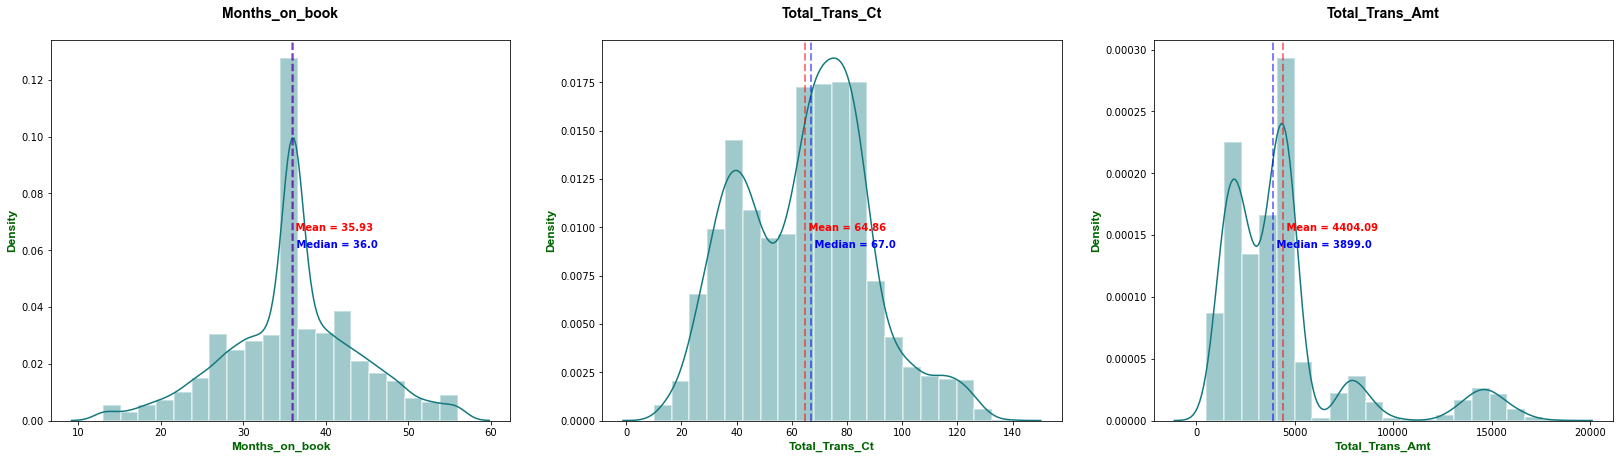

In [9]:
num_fields = ["Months_on_book", "Total_Trans_Ct", "Total_Trans_Amt"]
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "darkgreen", "weight" : "bold", "size" : 12}

figure, axes = plt.subplots(1, 3, figsize = (28, 7))

for field in num_fields:
    
    j = num_fields.index(field)
    
    sns.distplot(df[field], kde = True, bins = 20, color = "#13787d", hist_kws = dict(linewidth = 2, edgecolor = "white"), ax = axes[j])
    
    axes[j].axvline(df[field].mean(), color = "r", alpha = 0.5, ls = "--", lw = 2)
    axes[j].axvline(df[field].median(), color = "b", alpha = 0.5, ls = "--", lw = 2)
    
    axes[j].text(x = df[field].mean(), y = (axes[j].get_ylim()[1]) / 2,
                 s = f" Mean = {round(df[field].mean(), 2)}", color = "red", weight = "bold")
    axes[j].text(x = df[field].median(), y = (axes[j].get_ylim()[1]) / 2.2,
                 s = f" Median = {round(df[field].median(), 2)}", color = "blue", weight = "bold")
                
    axes[j].set_title(field + "\n", fontdict = title_font)
    axes[j].set_xlabel(field, fontdict = axes_font)
    axes[j].set_ylabel("Density", fontdict = axes_font)
    
    #axes[j].annotate("Shapiro-Wilk Test Results\n-----------------------------------",
                        #xy = (0.6, 0.8), xycoords = "axes fraction", fontsize = 10,
                        #horizontalalignment = "left", verticalalignment = "bottom", weight = "bold")
    #axes[j].annotate(f"Statistics = {round(shapiro(df[field])[0], 4)}\nP-Value = {round(shapiro(df[field])[1], 4)}",
                        #xy = (0.6, 0.75), xycoords = "axes fraction", fontsize = 10,
                        #horizontalalignment = "left", verticalalignment = "bottom")
      
plt.show()

In [10]:
num_fields = ["Avg_Open_To_Buy", "Credit_Limit", "Total_Amt_Chng_Q4_Q1"]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

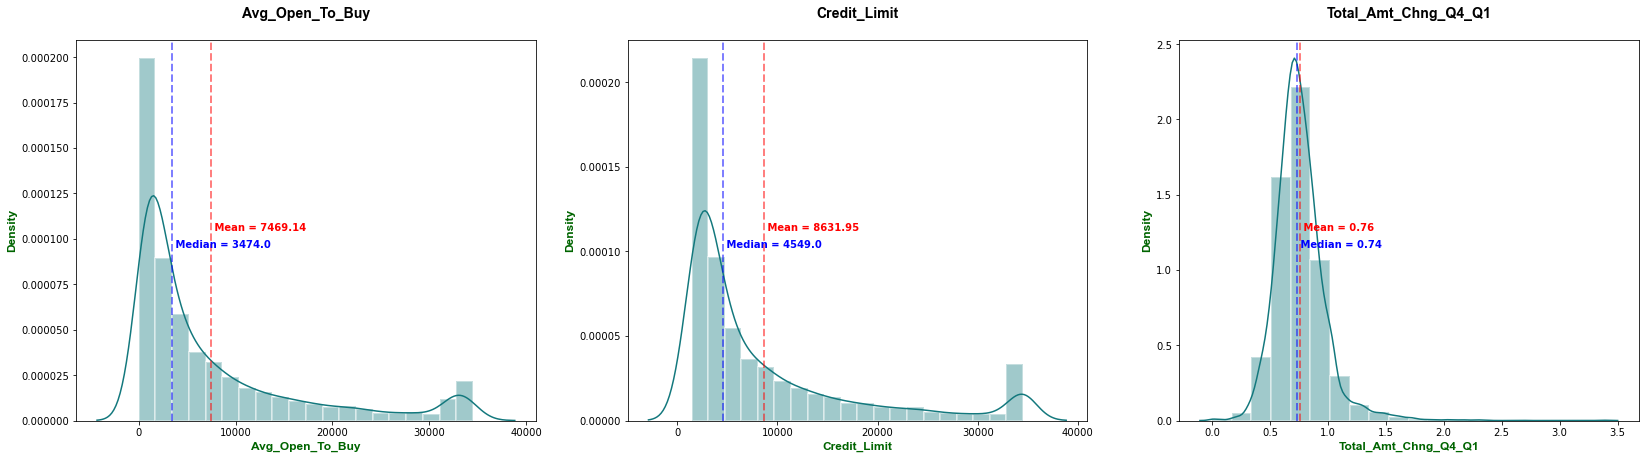

In [11]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "darkgreen", "weight" : "bold", "size" : 12}

figure, axes = plt.subplots(1, 3, figsize = (28, 7))

for field in num_fields:
    
    j = num_fields.index(field)
    
    sns.distplot(df[field], kde = True, bins = 20, color = "#13787d", hist_kws = dict(linewidth = 2, edgecolor = "white"), ax = axes[j])
    
    axes[j].axvline(df[field].mean(), color = "r", alpha = 0.5, ls = "--", lw = 2)
    axes[j].axvline(df[field].median(), color = "b", alpha = 0.5, ls = "--", lw = 2)
    
    axes[j].text(x = df[field].mean(), y = (axes[j].get_ylim()[1]) / 2,
                 s = f" Mean = {round(df[field].mean(), 2)}", color = "red", weight = "bold")
    axes[j].text(x = df[field].median(), y = (axes[j].get_ylim()[1]) / 2.2,
                 s = f" Median = {round(df[field].median(), 2)}", color = "blue", weight = "bold")
                
    axes[j].set_title(field + "\n", fontdict = title_font)
    axes[j].set_xlabel(field, fontdict = axes_font)
    axes[j].set_ylabel("Density", fontdict = axes_font)
    
    #axes[j].annotate("Shapiro-Wilk Test Results\n-----------------------------------",
                        #xy = (0.6, 0.8), xycoords = "axes fraction", fontsize = 10,
                        #horizontalalignment = "left", verticalalignment = "bottom", weight = "bold")
    #axes[j].annotate(f"Statistics = {round(shapiro(df[field])[0], 4)}\nP-Value = {round(shapiro(df[field])[1], 4)}",
                        #xy = (0.6, 0.75), xycoords = "axes fraction", fontsize = 10,
                        #horizontalalignment = "left", verticalalignment = "bottom")
      
plt.show()

In [12]:
num_fields = ["Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio", "Total_Revolving_Bal"]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

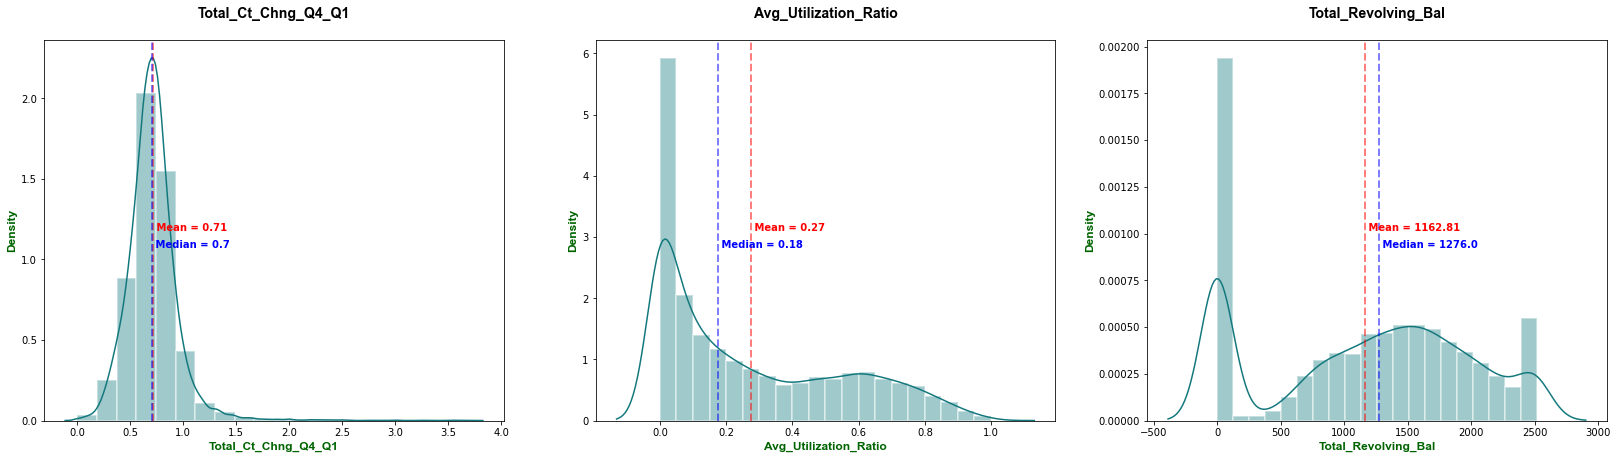

In [13]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "darkgreen", "weight" : "bold", "size" : 12}

figure, axes = plt.subplots(1, 3, figsize = (28, 7))

for field in num_fields:
    
    j = num_fields.index(field)
    
    sns.distplot(df[field], kde = True, bins = 20, color = "#13787d", hist_kws = dict(linewidth = 2, edgecolor = "white"), ax = axes[j])
    
    axes[j].axvline(df[field].mean(), color = "r", alpha = 0.5, ls = "--", lw = 2)
    axes[j].axvline(df[field].median(), color = "b", alpha = 0.5, ls = "--", lw = 2)
    
    axes[j].text(x = df[field].mean(), y = (axes[j].get_ylim()[1]) / 2,
                 s = f" Mean = {round(df[field].mean(), 2)}", color = "red", weight = "bold")
    axes[j].text(x = df[field].median(), y = (axes[j].get_ylim()[1]) / 2.2,
                 s = f" Median = {round(df[field].median(), 2)}", color = "blue", weight = "bold")
                
    axes[j].set_title(field + "\n", fontdict = title_font)
    axes[j].set_xlabel(field, fontdict = axes_font)
    axes[j].set_ylabel("Density", fontdict = axes_font)
    
    #axes[j].annotate("Shapiro-Wilk Test Results\n-----------------------------------",
                        #xy = (0.6, 0.8), xycoords = "axes fraction", fontsize = 10,
                        #horizontalalignment = "left", verticalalignment = "bottom", weight = "bold")
    #axes[j].annotate(f"Statistics = {round(shapiro(df[field])[0], 4)}\nP-Value = {round(shapiro(df[field])[1], 4)}",
                        #xy = (0.6, 0.75), xycoords = "axes fraction", fontsize = 10,
                        #horizontalalignment = "left", verticalalignment = "bottom")
      
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


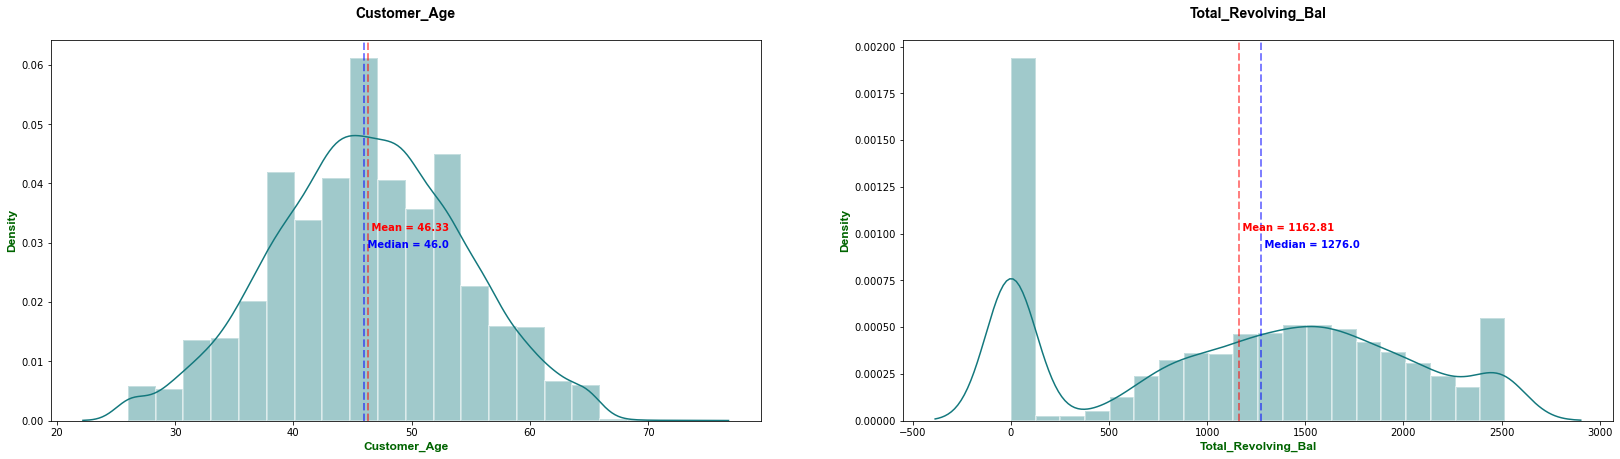

In [14]:
num_fields = ["Customer_Age", "Total_Revolving_Bal"]

title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "darkgreen", "weight" : "bold", "size" : 12}

figure, axes = plt.subplots(1, 2, figsize = (28, 7))

for field in num_fields:
    
    j = num_fields.index(field)
    
    sns.distplot(df[field], kde = True, bins = 20, color = "#13787d", hist_kws = dict(linewidth = 2, edgecolor = "white"), ax = axes[j])
    
    axes[j].axvline(df[field].mean(), color = "r", alpha = 0.5, ls = "--", lw = 2)
    axes[j].axvline(df[field].median(), color = "b", alpha = 0.5, ls = "--", lw = 2)
    
    axes[j].text(x = df[field].mean(), y = (axes[j].get_ylim()[1]) / 2,
                 s = f" Mean = {round(df[field].mean(), 2)}", color = "red", weight = "bold")
    axes[j].text(x = df[field].median(), y = (axes[j].get_ylim()[1]) / 2.2,
                 s = f" Median = {round(df[field].median(), 2)}", color = "blue", weight = "bold")
                
    axes[j].set_title(field + "\n", fontdict = title_font)
    axes[j].set_xlabel(field, fontdict = axes_font)
    axes[j].set_ylabel("Density", fontdict = axes_font)
    
    #axes[j].annotate("Shapiro-Wilk Test Results\n-----------------------------------",
                        #xy = (0.6, 0.8), xycoords = "axes fraction", fontsize = 10,
                        #horizontalalignment = "left", verticalalignment = "bottom", weight = "bold")
    #axes[j].annotate(f"Statistics = {round(shapiro(df[field])[0], 4)}\nP-Value = {round(shapiro(df[field])[1], 4)}",
                        #xy = (0.6, 0.75), xycoords = "axes fraction", fontsize = 10,
                        #horizontalalignment = "left", verticalalignment = "bottom")
      
plt.show()

In [15]:
categ = ['Gender','Education_Level','Marital_Status','Income_Category']

colors = ["gold", "mediumturquoise", "navajowhite", "darkorange",
          "lightgreen", "lightseagreen", "lightcoral", "lightslategrey"]

df["Attrition_Flag"].replace([0, 1] , ["No", "Yes"], inplace = True)

fig = make_subplots(rows = 1, cols = 4, specs = [[{"type": "pie"}] * 4],
                    shared_yaxes = True, subplot_titles = categ[:4])
 
for field in categ[0:4]:
    
    i = categ.index(field) + 1
    colors_ = colors[2 * i - 2:  2 * i]
    
    data = list(df[field])
    labels = df[field].unique()
    values = [data.count(labels[i]) for i in range(len(labels))]
    
    fig.add_trace(go.Pie(
        labels = labels,
        values = values,
        domain = dict(x = [0, 0.5]),
        name = field,
        marker = dict(colors = colors_, line = dict(color = "white", width = 2)),
        textinfo = "label+percent",
        hovertemplate = "<b>Quantity: </b> %{value} <br>",
        textfont_size = 12,
        showlegend = False), 
        row = 1, col = i)
    
    fig.update_layout(title = dict(text = "<b>Customers Demographic Info\b", x = 0.01, y = 0.96,
                                   font =  {"family" : "arial", "size" : 28, "color" : "#252525"}),
                      title_font_size = 30)

fig.show()

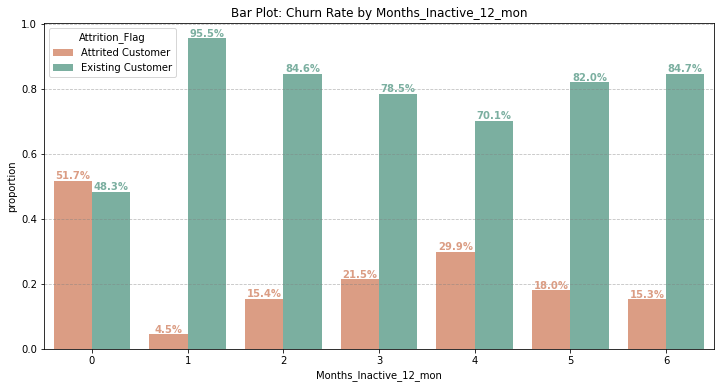

posx and posy should be finite values
posx and posy should be finite values


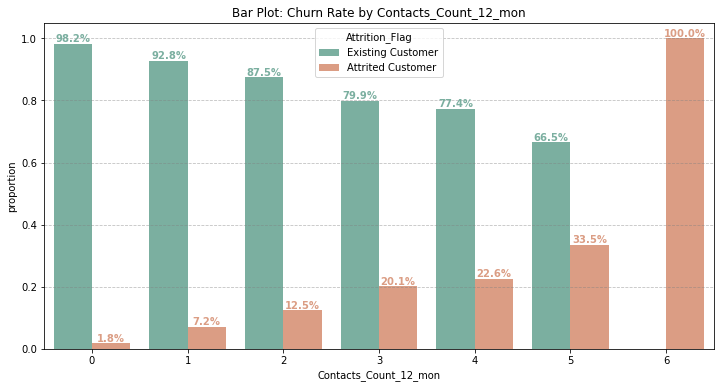

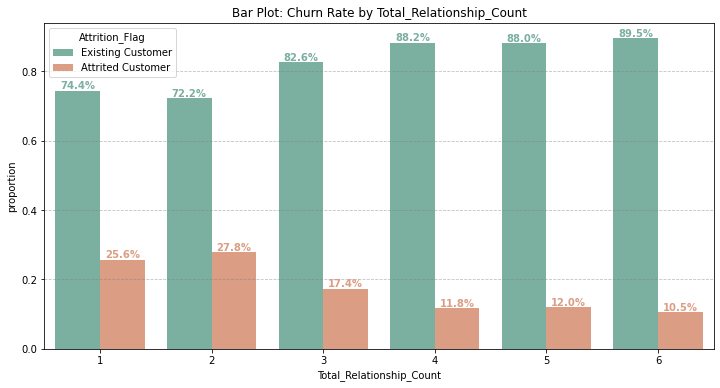

In [16]:
categ = ['Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Relationship_Count']

for col in categ:
    frequency = df.groupby(col, as_index=False)['Attrition_Flag'].value_counts(normalize=True).reset_index()
    fig = plt.figure(figsize = (12, 6))
    # plot with seaborn barplot
    ax=sns.barplot(data=frequency, x=col, y='proportion', hue='Attrition_Flag',palette={'Attrited Customer': '#E99776', 'Existing Customer': '#72B8A3'})
    plt.grid(which = "major", axis = "y", linestyle = "--", color = "grey", alpha = 0.5)
    for bar in ax.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        text = f'{str(round(bar_value*100,1))+"%"}'
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
       # get_y() is where the bar starts so we add the height to it.
        text_y = bar.get_y() + bar_value
       # If we want the text to be the same color as the bar, we can
       # get the color like so:
        bar_color = bar.get_facecolor()
        # If you want a consistent color, you can just set it as a constant, e.g. #222222
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=10, weight = "bold")
        plt.title(f"Bar Plot: Churn Rate by {col}")

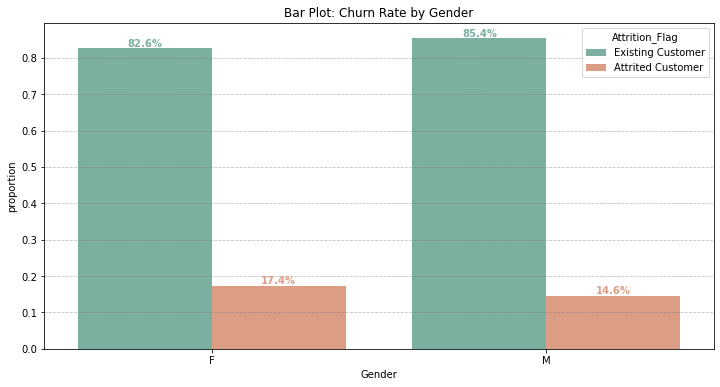

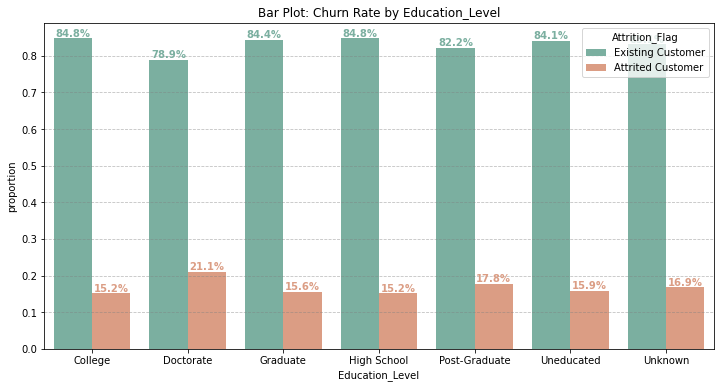

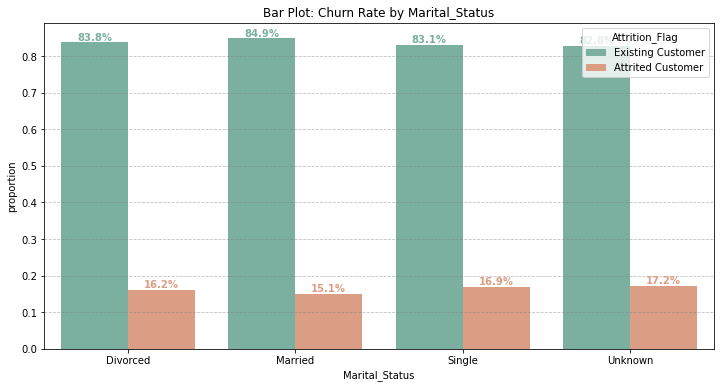

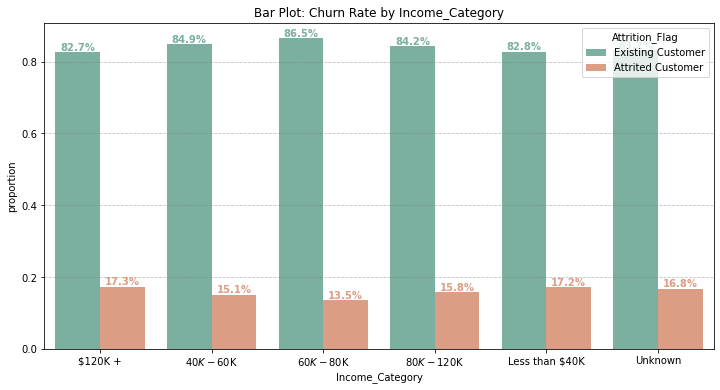

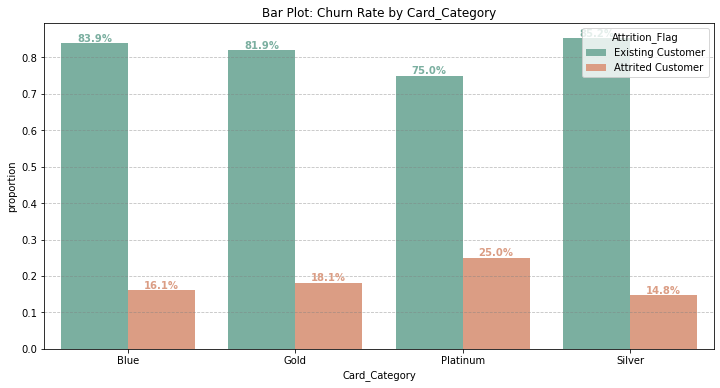

In [17]:
categ = ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']

for col in categ:
    frequency = df.groupby(col, as_index=False)['Attrition_Flag'].value_counts(normalize=True).reset_index()
    fig = plt.figure(figsize = (12, 6))
    # plot with seaborn barplot
    ax=sns.barplot(data=frequency, x=col, y='proportion', hue='Attrition_Flag',palette={'Attrited Customer': '#E99776', 'Existing Customer': '#72B8A3'})
    plt.grid(which = "major", axis = "y", linestyle = "--", color = "grey", alpha = 0.5)
    for bar in ax.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        text = f'{str(round(bar_value*100,1))+"%"}'
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
       # get_y() is where the bar starts so we add the height to it.
        text_y = bar.get_y() + bar_value
       # If we want the text to be the same color as the bar, we can
       # get the color like so:
        bar_color = bar.get_facecolor()
        # If you want a consistent color, you can just set it as a constant, e.g. #222222
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=10, weight = "bold")
        plt.title(f"Bar Plot: Churn Rate by {col}")

Text(0.5, 1.0, 'Bar Plot: Churn Rate by Dependent_count')

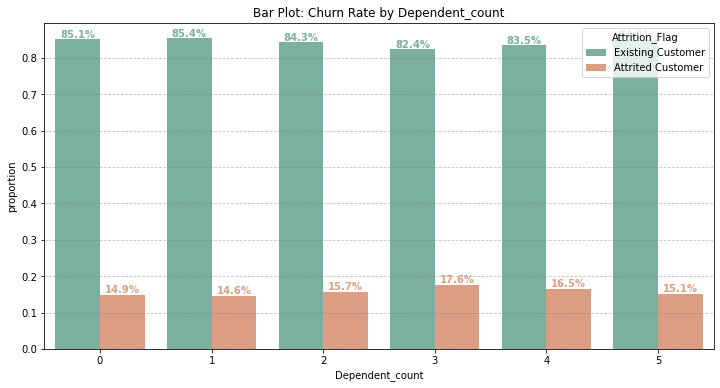

In [18]:
frequency = df.groupby('Dependent_count', as_index=False)['Attrition_Flag'].value_counts(normalize=True).reset_index()
fig = plt.figure(figsize = (12, 6))
# plot with seaborn barplot
ax=sns.barplot(data=frequency, x='Dependent_count', y='proportion', hue='Attrition_Flag',palette={'Attrited Customer': '#E99776', 'Existing Customer': '#72B8A3'})
plt.grid(which = "major", axis = "y", linestyle = "--", color = "grey", alpha = 0.5)
# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = round(bar.get_height(),3)
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{str(round(bar_value*100,1))+"%"}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=10, weight = "bold")
plt.title("Bar Plot: Churn Rate by Dependent_count")

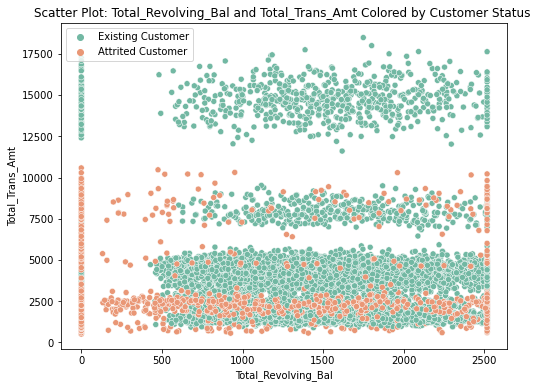

In [19]:
#plot the scatter plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Total_Revolving_Bal', y='Total_Trans_Amt', hue='Attrition_Flag', data=df,palette={'Attrited Customer': '#E99776', 'Existing Customer': '#72B8A3'})
#place legend outside top right corner of plot
 # set a title and labels
ax.set_title('Scatter Plot: Total_Revolving_Bal and Total_Trans_Amt Colored by Customer Status ')
ax.set_xlabel('Total_Revolving_Bal')
ax.set_ylabel('Total_Trans_Amt')
plt.legend(loc='upper left')
plt.show()

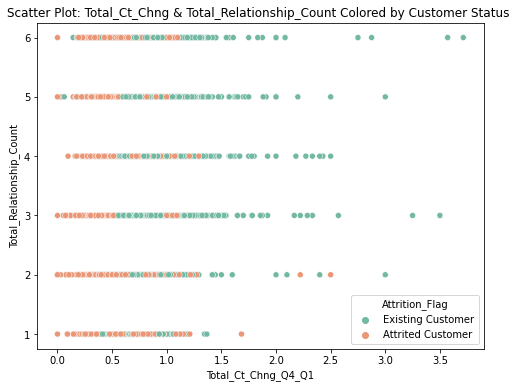

In [20]:
#plot the scatter plot 

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Total_Ct_Chng_Q4_Q1', y='Total_Relationship_Count', hue='Attrition_Flag', data=df,palette={'Attrited Customer': '#E99776', 'Existing Customer': '#72B8A3'})
# set a title and labels
ax.set_title('Scatter Plot: Total_Ct_Chng & Total_Relationship_Count Colored by Customer Status ')
ax.set_xlabel('Total_Ct_Chng_Q4_Q1')
ax.set_ylabel('Total_Relationship_Count')
plt.show()

In [21]:
data = list(df["Attrition_Flag"])
labels = df["Attrition_Flag"].unique()
values = [(data.count(labels[i]) / len(data) * 100) for i in range(len(labels))]


fig = go.Figure(data=[go.Bar(x=values,
                             y=labels,
                             orientation="h",
                             texttemplate="<b>%{x:.1f}%\b",
                             textposition="outside",
                             hoverinfo="none",
                             marker=dict(color=["#99EEC2", "#F7AF9F"]))])

for yi, xi in zip(labels, values):
    fig.add_annotation(
        text=f"<b>{yi}\b",
        x=xi / 2,
        y=yi,
        showarrow=False,
        font=dict(size=16),
        xanchor="center",
        yanchor="middle")

fig.update_yaxes(showticklabels=False)
fig.update_xaxes(showline=False, zeroline=False, showticklabels=False, showgrid=False)

fig.update_traces(textfont=dict(size=16))

fig.update_layout(title = dict(text = "<b>Total Churn Ratio\b", x = 0.01, y = 0.96,
                               font =  {"family" : "arial", "size" : 28, "color" : "#252525"}),
                  margin=dict(l=10, r=10, t=70, b=5), title_font_size = 30, height=400,
                  paper_bgcolor="#FFFFFF",
                  plot_bgcolor="#FFFFFF")

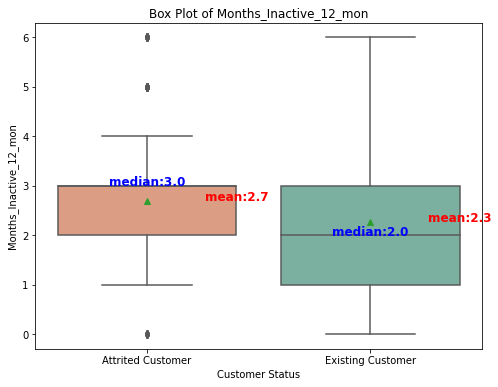

In [22]:
#plot the box plot of Total Credit Card Revolving Balance
fig, ax = plt.subplots(figsize=(8,6))
myorder = df.groupby(['Attrition_Flag'])['Months_Inactive_12_mon'].median().sort_values().iloc[::-1].index
box_plot =sns.boxplot(x=df['Attrition_Flag'], y=df['Months_Inactive_12_mon'], showmeans=True,palette={'Attrited Customer': '#E99776', 'Existing Customer': '#72B8A3'}, order = myorder)
medians = df.groupby(['Attrition_Flag'])['Months_Inactive_12_mon'].median().sort_values(ascending = False)
means = df.groupby(['Attrition_Flag'])['Months_Inactive_12_mon'].mean().sort_values(ascending = False)
for xtick in range(len(medians)):
    box_plot.annotate('median:'+str( medians[xtick]), xy = (xtick, medians[xtick]),horizontalalignment='center',size='large',color='b',weight='semibold')
for xtick in range(len(means)):
    box_plot.annotate('mean:'+str(round(means[xtick],1)), xy = (xtick+0.4, means[xtick]),horizontalalignment='center',size='large',color='r',weight='semibold')
plt.xlabel("Customer Status")
plt.ylabel("Months_Inactive_12_mon")
plt.title("Box Plot of Months_Inactive_12_mon")
plt.show()

In [23]:
df.groupby(['Attrition_Flag'])['Total_Revolving_Bal'].median().sort_values().iloc[::-1].index

Index(['Existing Customer', 'Attrited Customer'], dtype='object', name='Attrition_Flag')

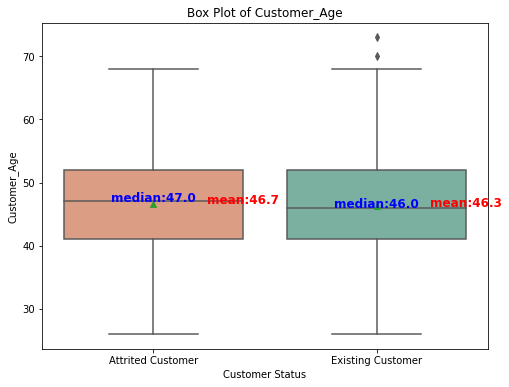

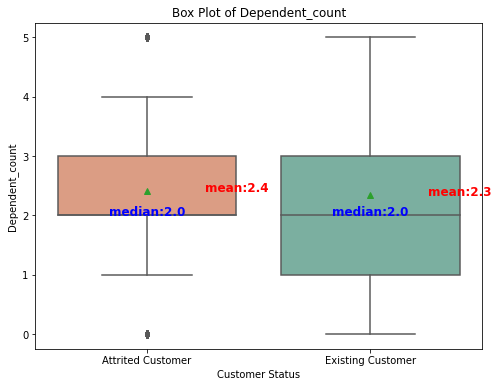

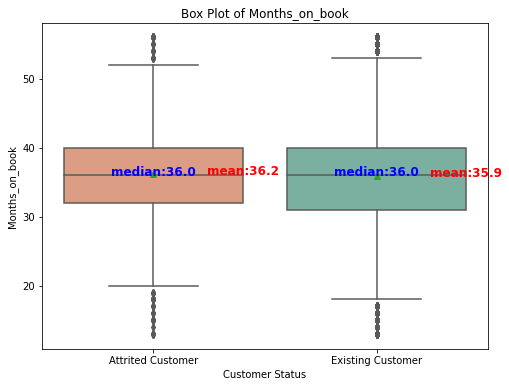

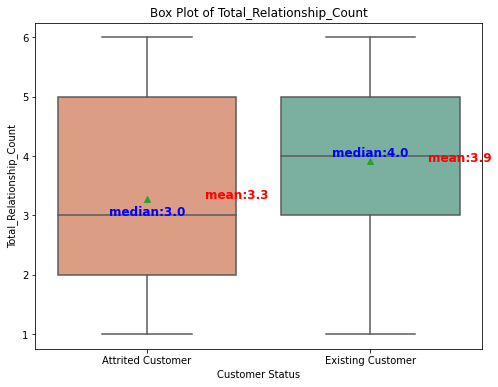

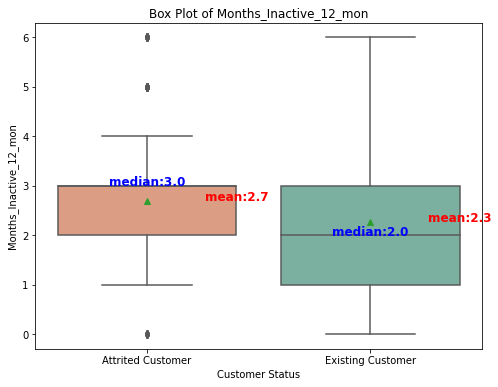

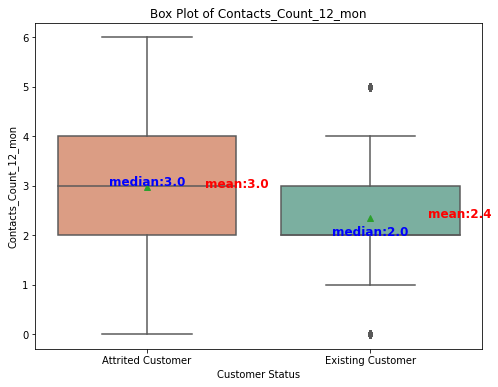

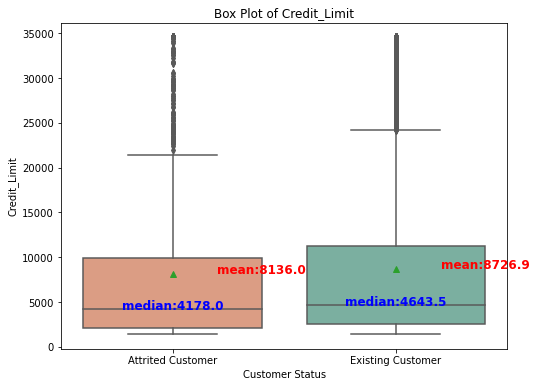

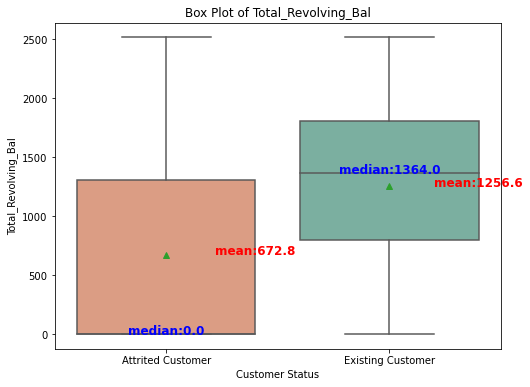

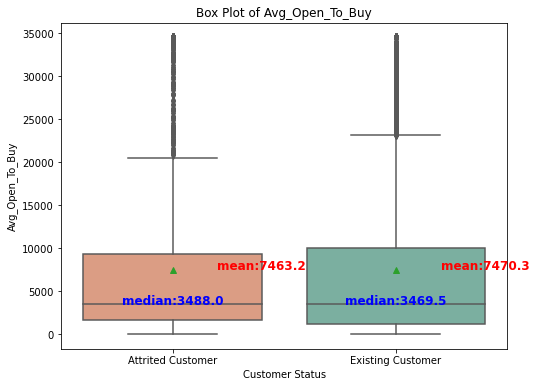

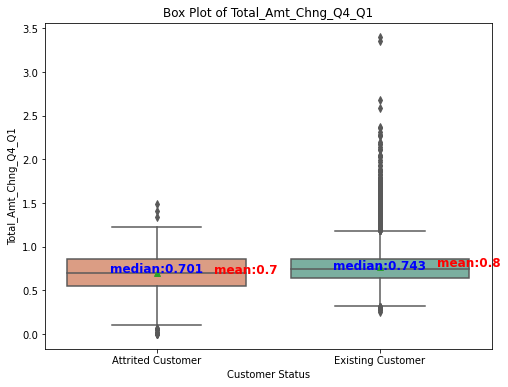

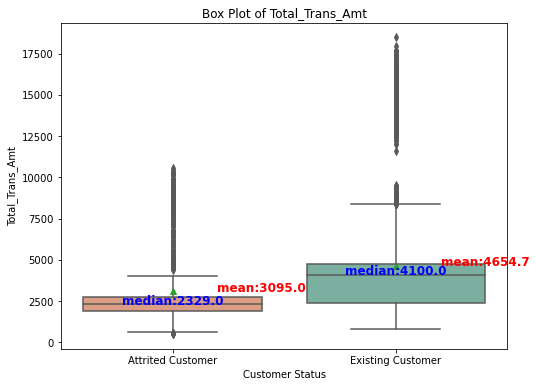

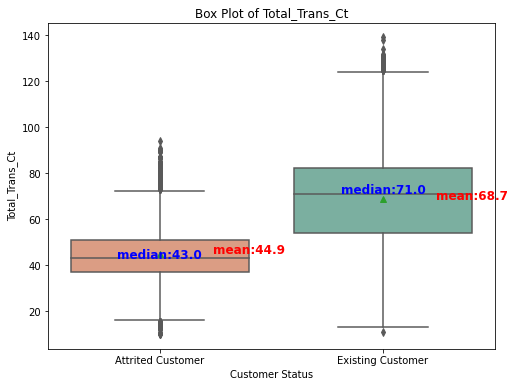

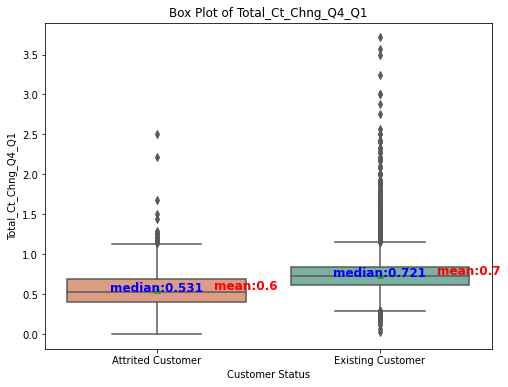

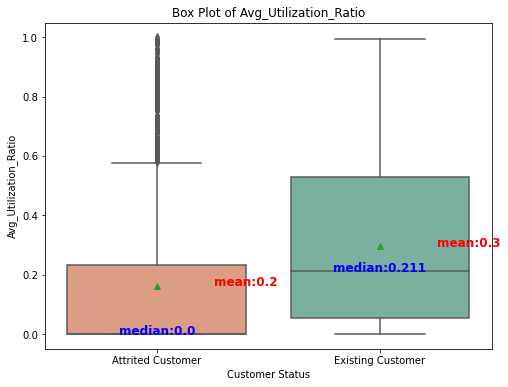

In [24]:
numerics_type = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = df.select_dtypes(include=numerics_type)

for i in numerics:
    fig, ax = plt.subplots(figsize=(8,6))
    order = df.groupby(['Attrition_Flag'])[i].median().index
    medians = df.groupby(['Attrition_Flag'])[i].median()
    box_plot =sns.boxplot(x=df['Attrition_Flag'], y=df[i], showmeans=True,palette={'Attrited Customer': '#E99776', 'Existing Customer': '#72B8A3'}, order=order)
    means = df.groupby(['Attrition_Flag'])[i].mean()
    for xtick in range(len(medians)):
        box_plot.annotate('median:'+str(medians[xtick]), xy = (xtick, medians[xtick]),horizontalalignment='center',size='large',color='b',weight='semibold')
    for xtick in range(len(means)):
        box_plot.annotate('mean:'+str(round(means[xtick],1)), xy = (xtick+0.4, means[xtick]),horizontalalignment='center',size='large',color='r',weight='semibold')
    plt.xlabel("Customer Status")
    plt.ylabel(i)
    plt.title("Box Plot of " + i)
    plt.show()

In [25]:
range(len(medians))

range(0, 2)

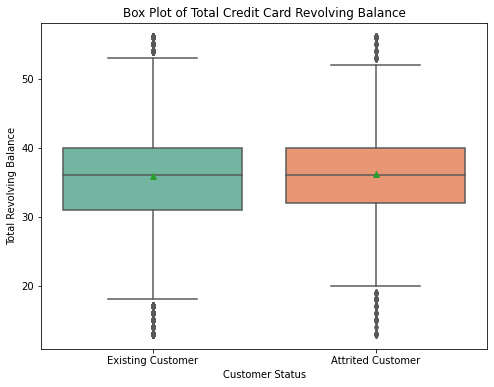

In [26]:
#plot the box plot of Total Credit Card Revolving Balance
fig, ax = plt.subplots(figsize=(8,6))
box_plot =sns.boxplot(x=df['Attrition_Flag'], y=df['Months_on_book'], showmeans=True, palette="Set2")


plt.xlabel("Customer Status")
plt.ylabel("Total Revolving Balance")
plt.title("Box Plot of Total Credit Card Revolving Balance")
plt.show()

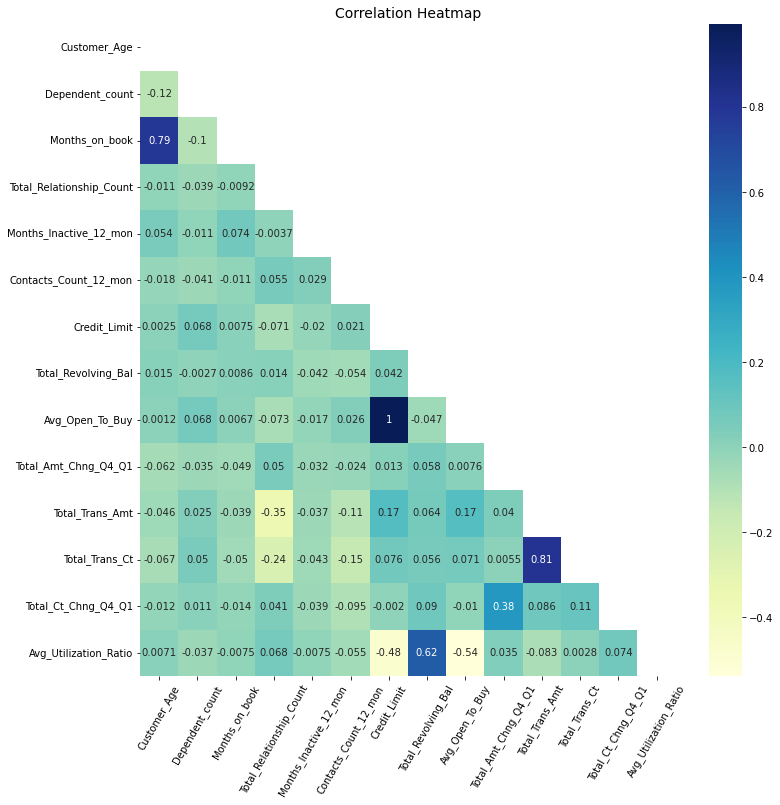

In [27]:
#create correlation matrix
plt.figure(figsize = (12,12))
# creating mask
mask = np.triu(np.ones_like(numerics.corr()))
matrix = numerics.corr()
sns.heatmap(matrix,  cmap="YlGnBu", annot=True, mask=mask)
 # set a title and labels
plt.yticks(rotation = 360)
plt.xticks(rotation = 60)
plt.title('Correlation Heatmap', fontsize = 14)
plt.show()

In [28]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [29]:
categ = df[df.columns[df.dtypes == object]]

In [30]:
#Chi-Squre
from scipy.stats import chi2_contingency

In [31]:
columns = categ.columns
for col in columns:
    crosstab = pd.crosstab(index=categ['Attrition_Flag'],columns=categ[col])
    print(col, "vs Attrition:", 'The P-Value of the ChiSq Test is:'+ '{:.20f}'.format(chi2_contingency(crosstab)[1]))
    print(crosstab)

Attrition_Flag vs Attrition: The P-Value of the ChiSq Test is:0.00000000000000000000
Attrition_Flag     Attrited Customer  Existing Customer
Attrition_Flag                                         
Attrited Customer               1627                  0
Existing Customer                  0               8500
Gender vs Attrition: The P-Value of the ChiSq Test is:0.00019635846717310269
Gender                F     M
Attrition_Flag               
Attrited Customer   930   697
Existing Customer  4428  4072
Education_Level vs Attrition: The P-Value of the ChiSq Test is:0.05148913147336627028
Education_Level    College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                                
Attrited Customer      154         95       487          306             92   
Existing Customer      859        356      2641         1707            424   

Education_Level    Uneducated  Unknown  
Attrition_Flag                          
Attrited 

In [32]:
# perform Welch's ANOVA
import pingouin as pg

In [33]:
#col_num = numerics.drop(['Attrition_Flag'], axis =1).columns

anova_df=[]
for col in numerics:
    ano = pg.welch_anova(dv=col, between='Attrition_Flag', data=df)
    p = ano.iloc[0]['p-unc']
    print(col, "vs Attrition:", 'The P-Value of the Anova Test is:'+ '{:.20f}'.format(p))

Customer_Age vs Attrition: The P-Value of the Anova Test is:0.05771863257630033273
Dependent_count vs Attrition: The P-Value of the Anova Test is:0.05251960405396625953
Months_on_book vs Attrition: The P-Value of the Anova Test is:0.16038505264250871307
Total_Relationship_Count vs Attrition: The P-Value of the Anova Test is:0.00000000000000000000
Months_Inactive_12_mon vs Attrition: The P-Value of the Anova Test is:0.00000000000000000000
Contacts_Count_12_mon vs Attrition: The P-Value of the Anova Test is:0.00000000000000000000
Credit_Limit vs Attrition: The P-Value of the Anova Test is:0.01642962859132565678
Total_Revolving_Bal vs Attrition: The P-Value of the Anova Test is:0.00000000000000000000
Avg_Open_To_Buy vs Attrition: The P-Value of the Anova Test is:0.97715474805160351668
Total_Amt_Chng_Q4_Q1 vs Attrition: The P-Value of the Anova Test is:0.00000000000000000000
Total_Trans_Amt vs Attrition: The P-Value of the Anova Test is:0.00000000000000000000
Total_Trans_Ct vs Attrition: T

In [34]:
df_new = df[['Attrition_Flag', 'Gender', 'Income_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [35]:
df_new

Attrition_Flag Gender Income_Category  Total_Relationship_Count  \
0      Existing Customer      M     $60K - $80K                         5   
1      Existing Customer      F  Less than $40K                         6   
2      Existing Customer      M    $80K - $120K                         4   
3      Existing Customer      F  Less than $40K                         3   
4      Existing Customer      M     $60K - $80K                         5   
...                  ...    ...             ...                       ...   
10122  Existing Customer      M     $40K - $60K                         3   
10123  Attrited Customer      M     $40K - $60K                         4   
10124  Attrited Customer      F  Less than $40K                         5   
10125  Attrited Customer      M     $40K - $60K                         4   
10126  Attrited Customer      F  Less than $40K                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Revolving_Bal  \
0                           1                      3                  777   
1                           1                      2                  864   
2                           1                      0                    0   
3                           4                      1                 2517   
4                           1                      0                    0   
...                       ...                    ...                  ...   
10122                       2                      3                 1851   
10123                       2                      3                 2186   
10124                       3                      4                    0   
10125                       3                      3                    0   
10126                       2                      4                 1961   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60                0.818   
10125             8395              62                0.722   
10126            10294              61                0.649   

       Avg_Utilization_Ratio  
0                      0.061  
1                      0.105  
2                      0.000  
3                      0.760  
4                      0.000  
...                      ...  
10122                  0.462  
10123                  0.511  
10124                  0.000  
10125                  0.000  
10126                  0.189  

[10127 rows x 11 columns]

In [36]:
categorical = df_new.columns[df_new.dtypes == object]
#encode the categorical variables
df_dumm = pd.get_dummies(df_new, columns = categorical, drop_first=True)

In [37]:
df_dumm

Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Total_Revolving_Bal  Total_Trans_Amt  \
0                          3                  777             1144   
1                          2                  864             1291   
2                          0                    0             1887   
3                          1                 2517             1171   
4                          0                    0              816   
...                      ...                  ...              ...   
10122                      3                 1851            15476   
10123                      3                 2186             8764   
10124                      4                    0            10291   
10125                      3                    0             8395   
10126                      4                 1961            10294   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                  42                1.625                  0.061   
1                  33                3.714                  0.105   
2                  20                2.333                  0.000   
3                  20                2.333                  0.760   
4                  28                2.500                  0.000   
...               ...                  ...                    ...   
10122             117                0.857                  0.462   
10123              69                0.683                  0.511   
10124              60                0.818                  0.000   
10125              62                0.722                  0.000   
10126              61                0.649                  0.189   

       Attrition_Flag_Existing Customer  Gender_M  \
0                                     1         1   
1                                     1         0   
2                                     1         1   
3                                     1         0   
4                                     1         1   
...                                 ...       ...   
10122                                 1         1   
10123                                 0         1   
10124                                 0         0   
10125                                 0         1   
10126                                 0         0   

       Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                                0                            1   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            1   
...                            ...                          ...   
10122                            1                            0   
10123                            1                            0   
10124                            0                            0   
10125                            1                            0   
10126                            0                            0   

       Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0                                 0                               0   
1                                 0         

In [38]:
y = df_dumm['Attrition_Flag_Existing Customer']
x = df_dumm.drop('Attrition_Flag_Existing Customer', axis =1)

In [39]:
#split data
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state=111)

In [40]:
#check the number of churned customers and exsiting customers after oversampling
train = train_y.value_counts().reset_index()

train

index  Attrition_Flag_Existing Customer
0      1                              6798
1      0                              1303

In [41]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2)
train_x, train_y = ros.fit_resample(train_x, train_y)

/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



In [42]:
#check the number of churned customers and exsiting customers after oversampling
train = train_y.value_counts().reset_index()

train

index  Attrition_Flag_Existing Customer
0      1                              6798
1      0                              6798

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Fit the decision tree with the penalty matrix
tree_m = DecisionTreeClassifier(criterion='gini',
                              splitter='best',
                              class_weight = 'balanced',
                              max_depth=None, random_state=42)

tree_m.fit(train_x, train_y) 

DecisionTreeClassifier(class_weight='balanced', random_state=42)

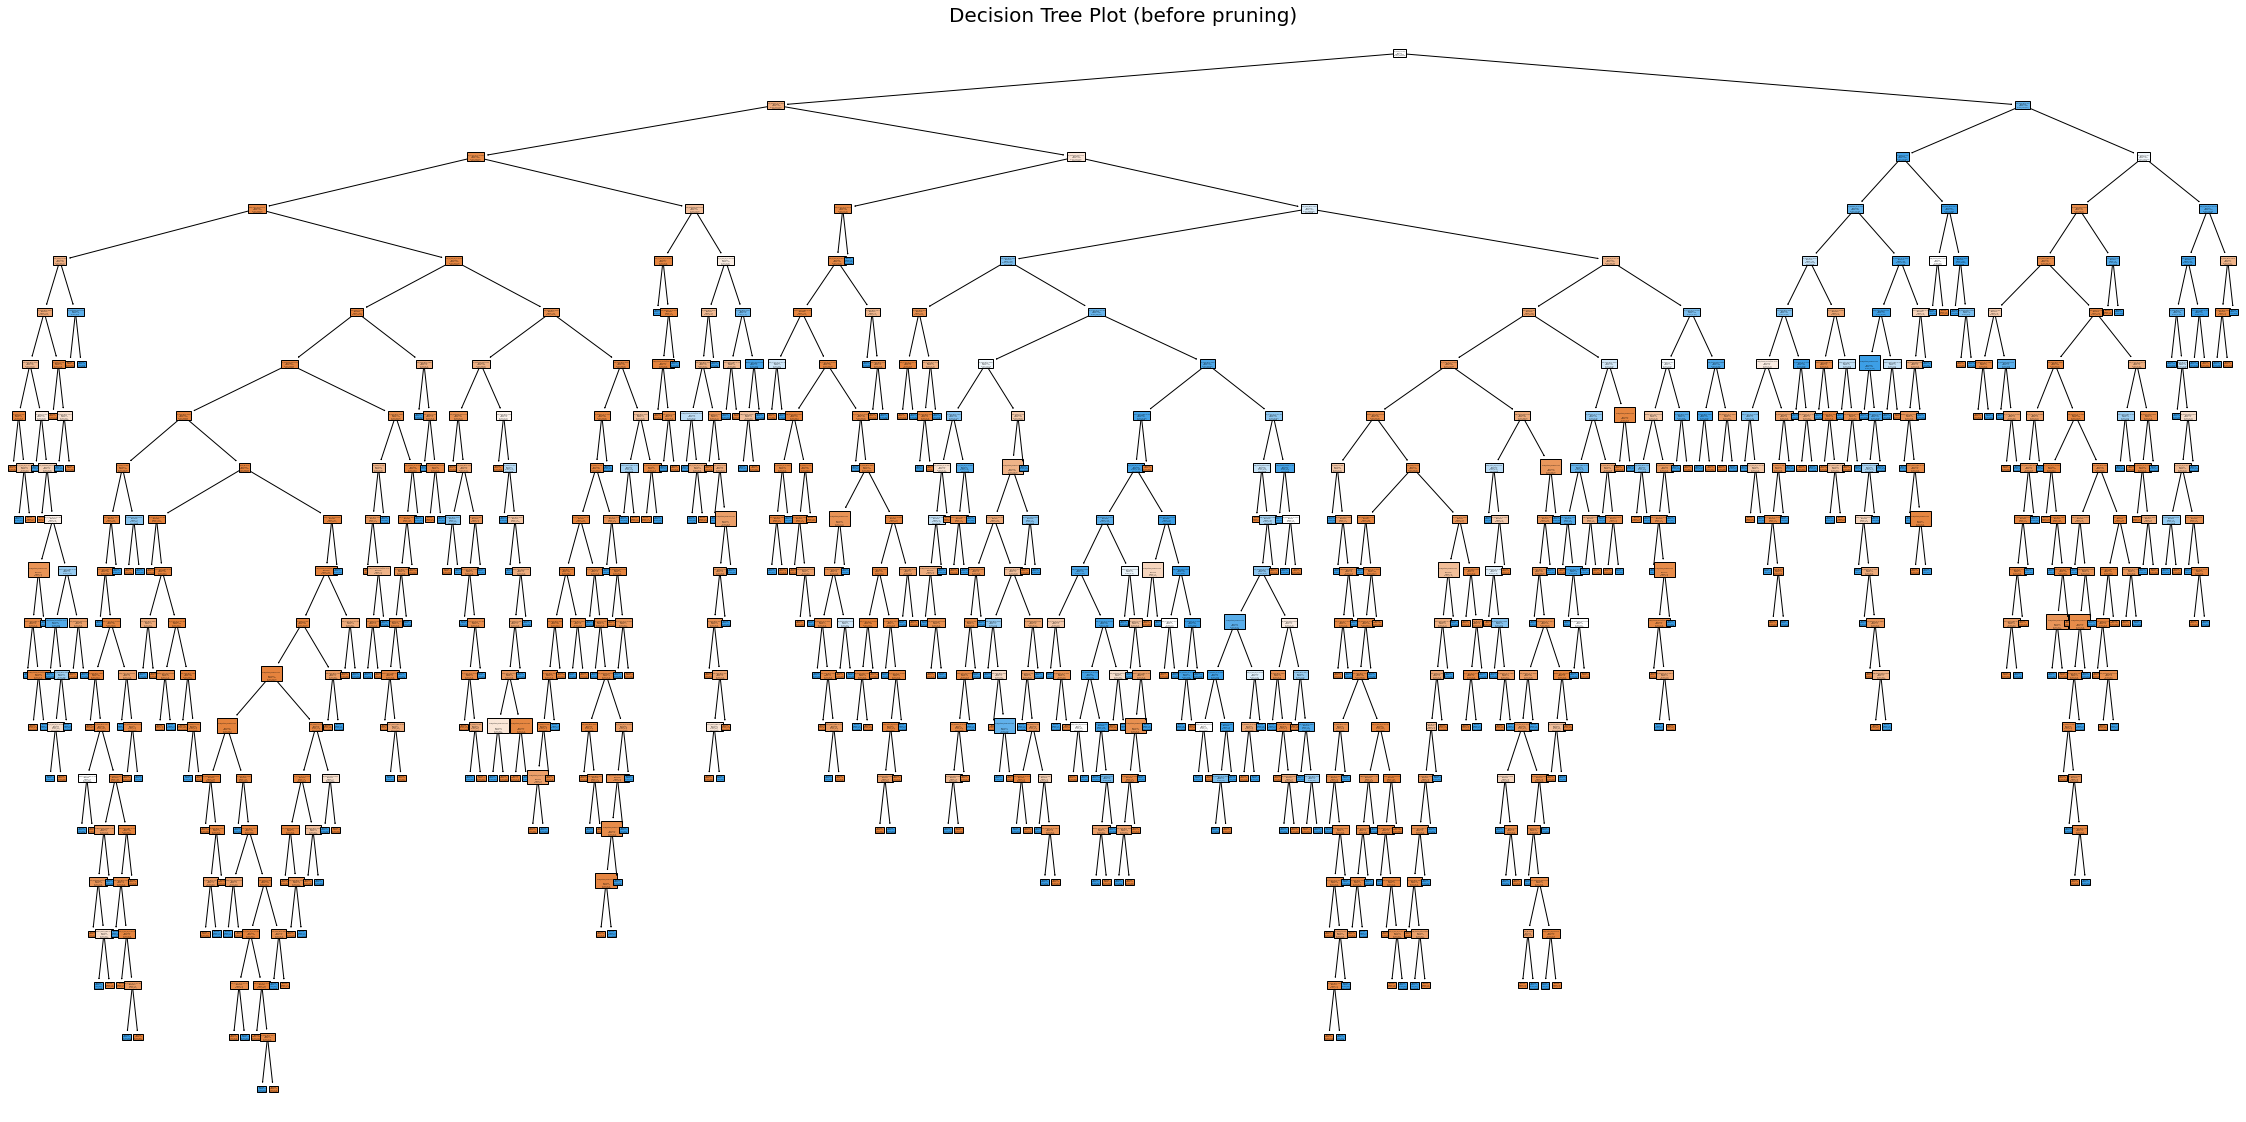

In [44]:
#Visualizing a Decision Tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(40,20))

plot_tree(tree_m, feature_names=train_x.columns, class_names=["Churned",'Existing'], max_depth=None, filled=True)
plt.title("Decision Tree Plot (before pruning)", size= 20)
plt.show()

In [45]:
y_train_pred = tree_m.predict(train_x)
y_test_pred = tree_m.predict(test_x)
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(train_y, y_train_pred))
confusion_matrix(train_y, y_train_pred)

1.0


array([[6798,    0],
       [   0, 6798]])

In [46]:
print(accuracy_score(test_y, y_test_pred))
confusion_matrix(test_y, y_test_pred)

0.9279368213228035


array([[ 244,   80],
       [  66, 1636]])

In [47]:
accuracy = accuracy_score(test_y, y_test_pred)
recall = recall_score(test_y, y_test_pred)
precision = precision_score(test_y, y_test_pred)
f1 = f1_score(test_y, y_test_pred)
print("Accuracy of Decision Tree:", accuracy)
print("Precision of Decision Tree:", precision)
print("Recall of Decision Tree:", recall)
print("F1 of Decision Tree:", f1)

Accuracy of Decision Tree: 0.9279368213228035
Precision of Decision Tree: 0.9533799533799534
Recall of Decision Tree: 0.9612220916568742
F1 of Decision Tree: 0.957284961966062


In [48]:
path = tree_m.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)

In [49]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_x, train_y)
    clfs.append(clf)

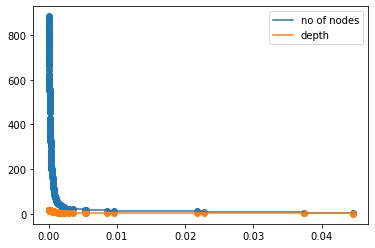

In [50]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

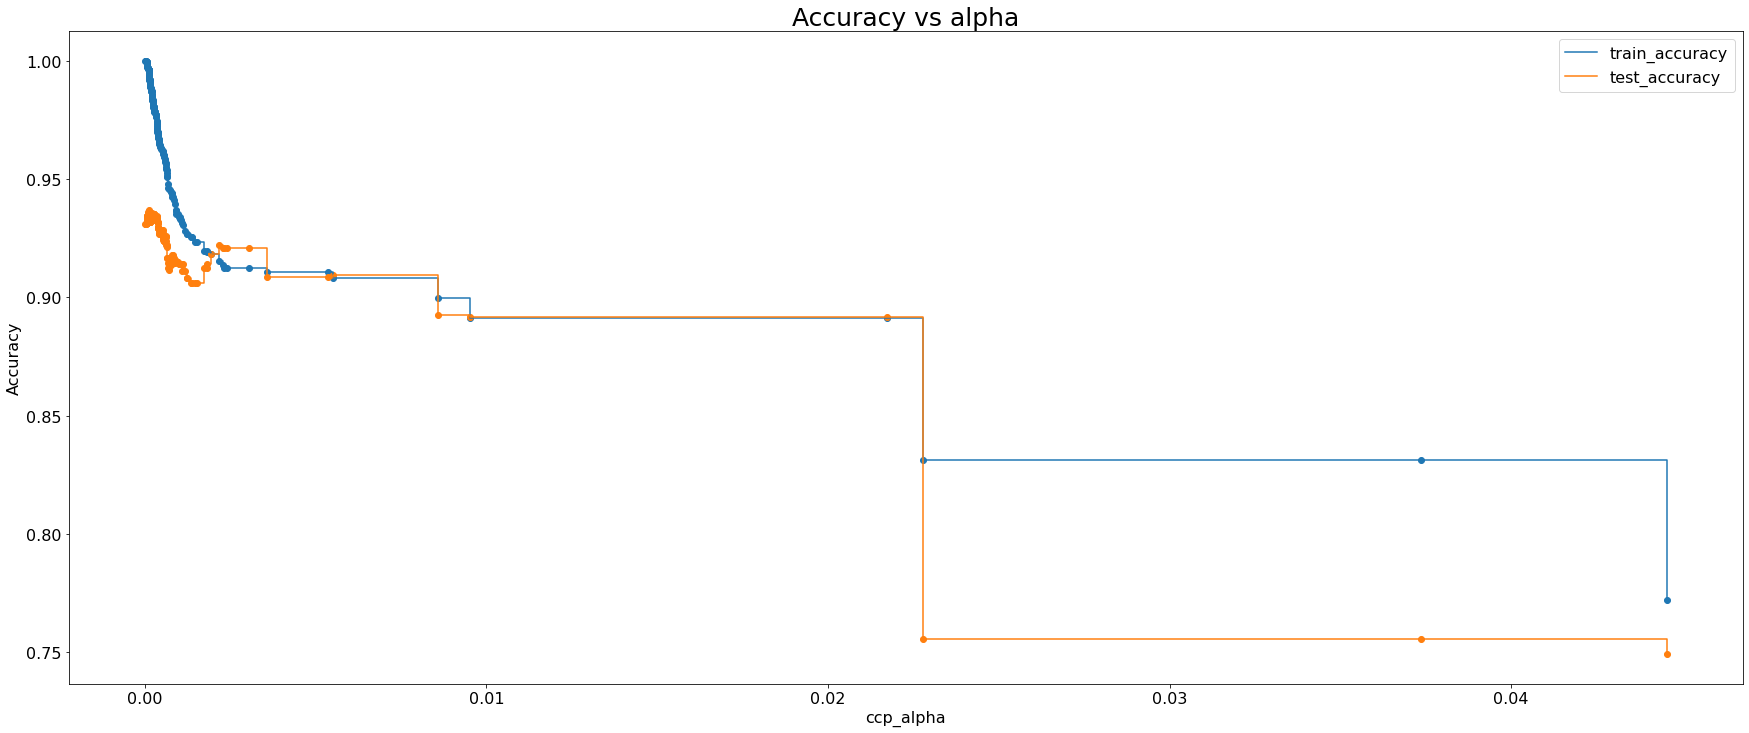

In [51]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(train_x)
    y_test_pred = c.predict(test_x)
    train_acc.append(accuracy_score(y_train_pred,train_y))
    test_acc.append(accuracy_score(y_test_pred,test_y))
plt.figure(figsize = (30,12))
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.xlabel('ccp_alpha', size = 16)
plt.ylabel('Accuracy', size = 16)
plt.legend(fontsize =16)
plt.title('Accuracy vs alpha', size = 25)
plt.show()

In [52]:
index = test_acc.index(test_acc[-12])
ccp_alphas[index]

0.002298207891600154

In [53]:
clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alphas[index])
clf.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.002298207891600154, random_state=0)

In [54]:
y_train_pred_post = clf.predict(train_x)
y_test_pred_post = clf.predict(test_x)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(train_y, y_train_pred_post))
confusion_matrix(train_y, y_train_pred_post)

0.9136510738452486


array([[6192,  606],
       [ 568, 6230]])

In [56]:
print(accuracy_score(test_y, y_test_pred_post))
confusion_matrix(test_y, y_test_pred_post)

0.9210266535044422


array([[ 286,   38],
       [ 122, 1580]])

In [57]:
accuracy = accuracy_score(test_y, y_test_pred_post)
recall = recall_score(test_y, y_test_pred_post)
precision = precision_score(test_y, y_test_pred_post)
f1 = f1_score(test_y, y_test_pred_post)
print("Accuracy of Decision Tree:", accuracy)
print("Precision of Decision Tree:", precision)
print("Recall of Decision Tree:", recall)
print("F1 of Decision Tree:", f1)

Accuracy of Decision Tree: 0.9210266535044422
Precision of Decision Tree: 0.9765142150803461
Recall of Decision Tree: 0.9283196239717979
F1 of Decision Tree: 0.9518072289156627


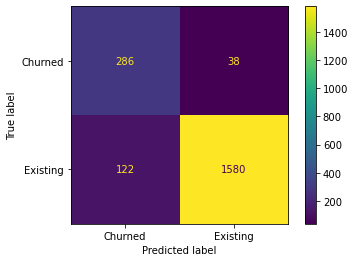

In [61]:
ConfusionMatrixDisplay.from_estimator(clf,
                       test_x,
                       test_y,
                       #values_format = 'd',
                       display_labels = ['Churned', 'Existing'])

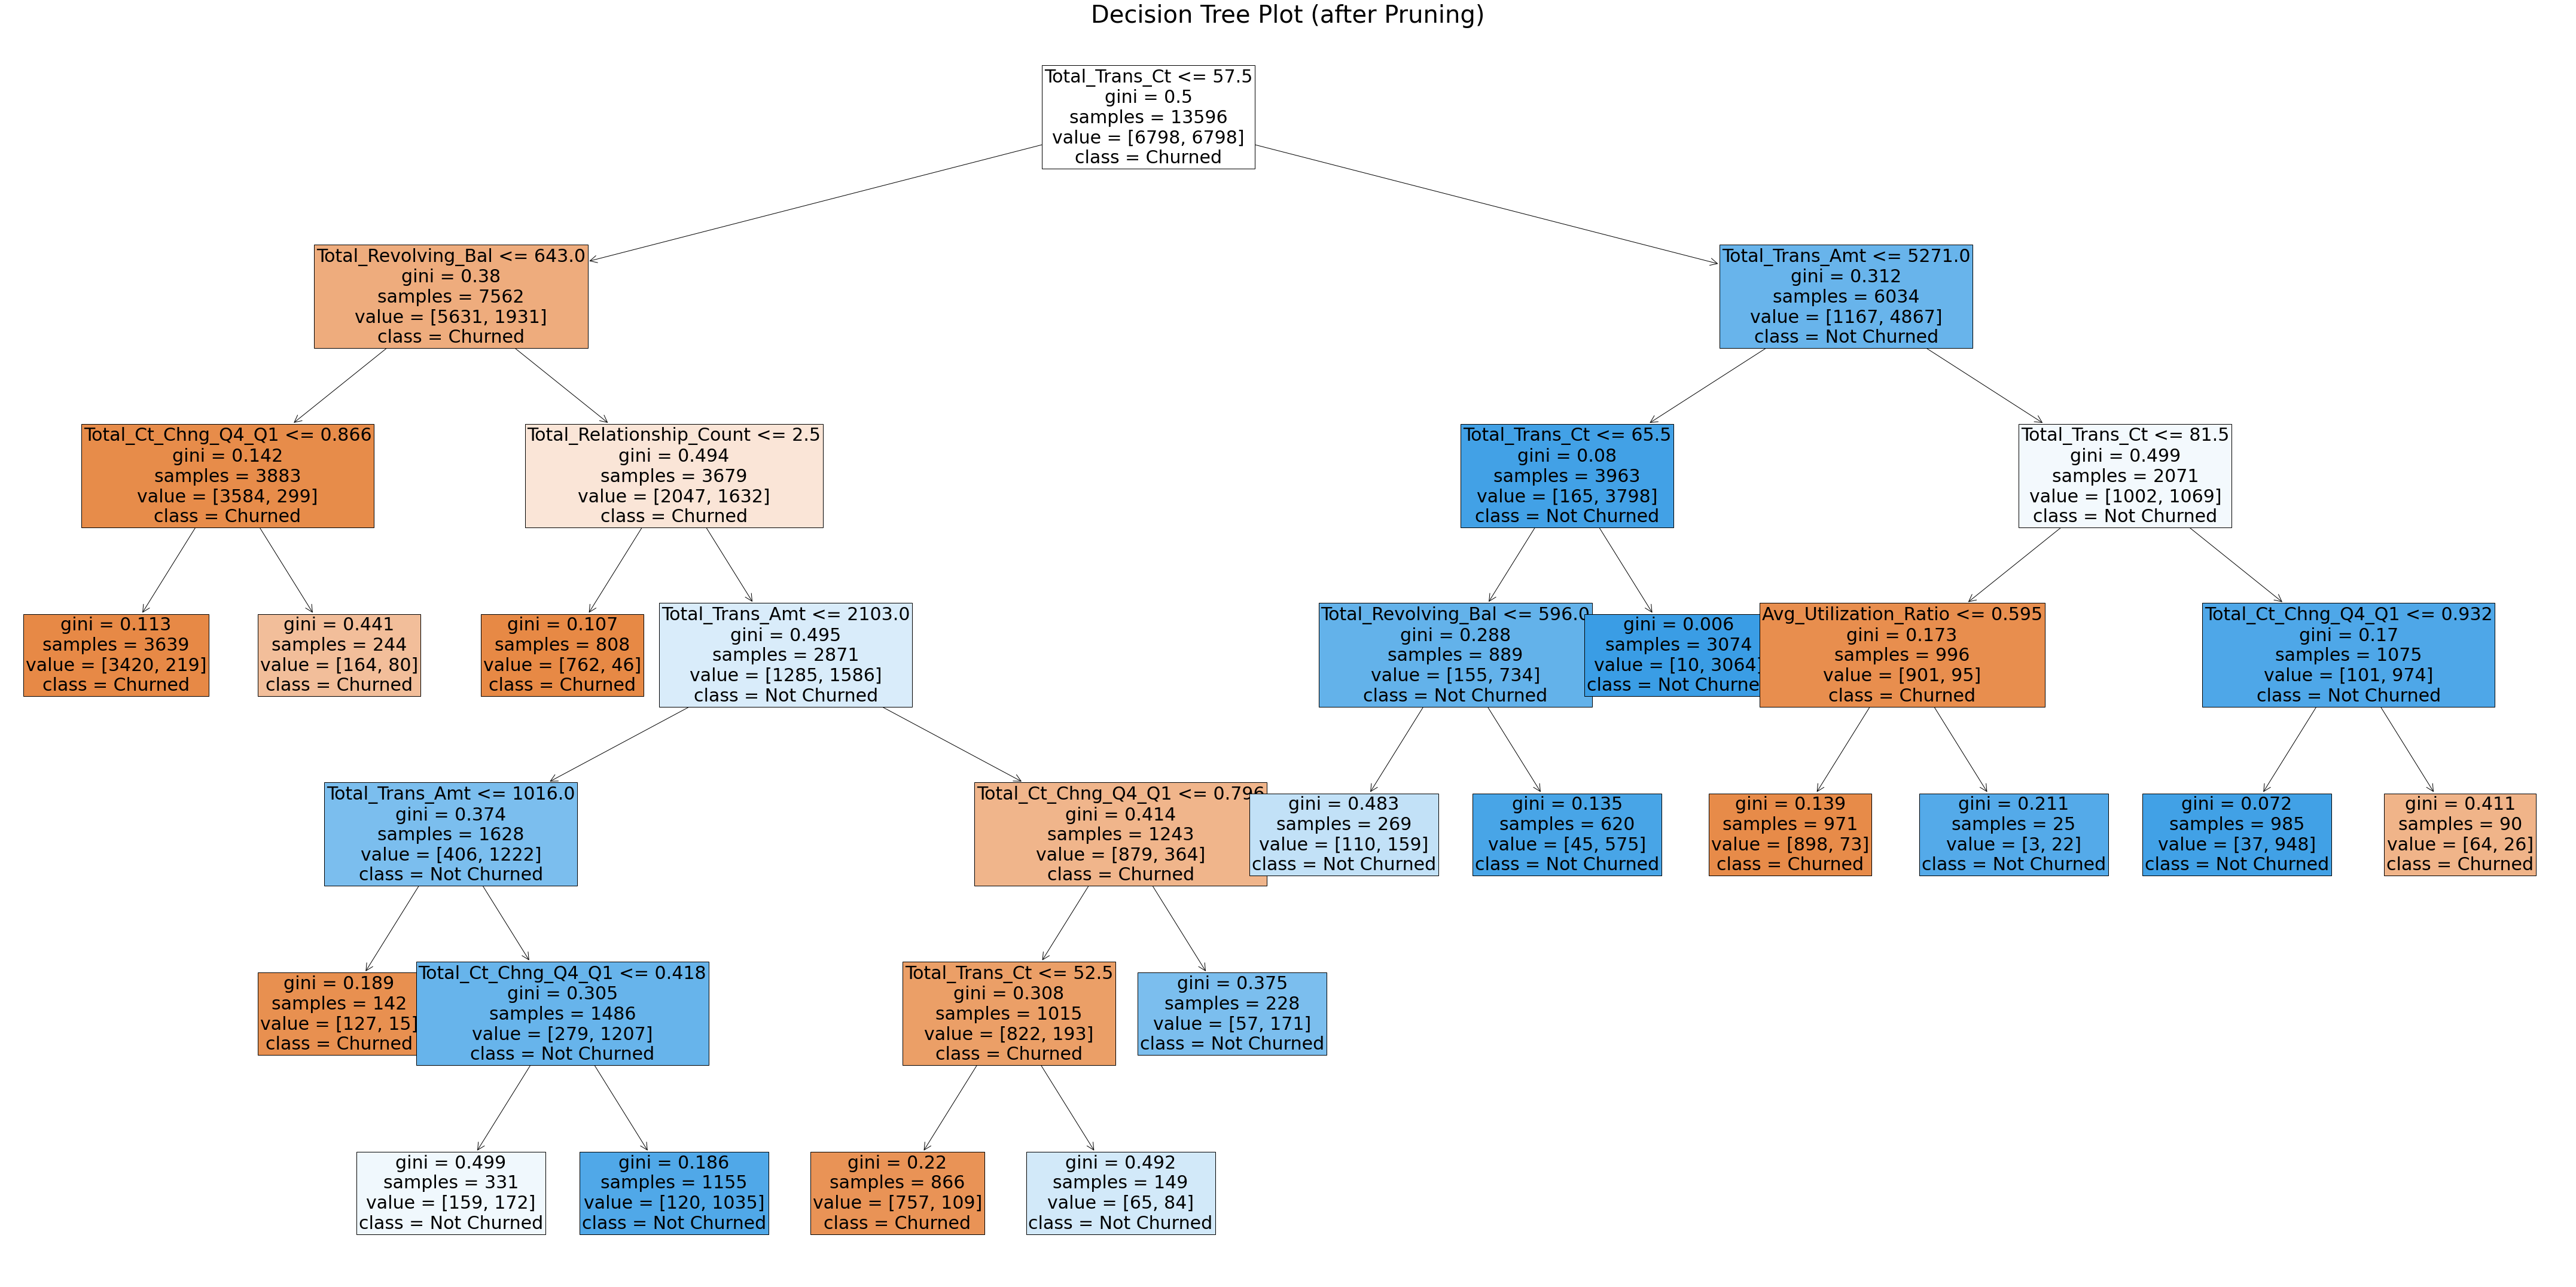

In [62]:
#Visualizing a Decision Tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(60,30))

plot_tree(clf, feature_names=train_x.columns, class_names=['Churned', 'Not Churned'], max_depth=None, filled=True,fontsize=30);
plt.title("Decision Tree Plot (after Pruning)", size= 40)
plt.tight_layout()
plt.show()

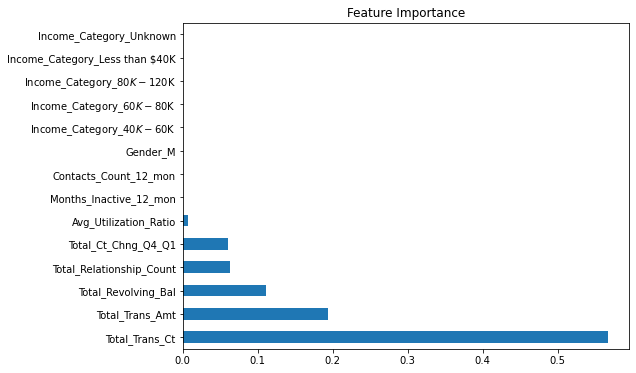

In [63]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(clf.feature_importances_, index=train_x.columns).sort_values(ascending=False)

# Plot a simple bar chart
fig, ax = plt.subplots(figsize=(8,6))
feature_importances.plot.barh();
plt.title('Feature Importance')
plt.show()

In [65]:
#import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint


In [66]:
#train the random forst model
rf = RandomForestClassifier(random_state=333)
rf.fit(train_x, train_y)

RandomForestClassifier(random_state=333)

In [67]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 333, 'verbose': 0, 'warm_start': False}


In [68]:
#make predictions with the model
y_pred = rf.predict(test_x)

In [69]:
#check the accuracy, precision and recall

accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)

print("Accuracy of Random Forest with PCA selected Features:", accuracy)
print("Precision of Random Forest with PCA selected Features:", precision)
print("Recall of Random Forest with PCA selected Features:", recall)

Accuracy of Random Forest with PCA selected Features: 0.9570582428430404
Precision of Random Forest with PCA selected Features: 0.9686593151479976
Recall of Random Forest with PCA selected Features: 0.9806110458284372


In [70]:
#define the parameter distribution for tuning
param_grid = { 
    'n_estimators': [50, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : range(10),
    'criterion' :['gini']
}
optimal_params = GridSearchCV(RandomForestClassifier(),param_grid,cv =5,scoring = 'accuracy',verbose = 0)

In [71]:
import time
start = time.time()
optimal_params.fit(train_x, train_y)
stop = time.time()
print(f"Training time: {stop - start}s")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFores

Training time: 269.0773799419403s


In [72]:
optimal_params.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [73]:
rfc1=RandomForestClassifier(random_state=333, max_features='auto', n_estimators= 50, max_depth=9, criterion='gini')
rfc1.fit(train_x, train_y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=50,
                       random_state=333)

In [74]:
#make predictions with the model
y_pred1 = rfc1.predict(test_x)


In [75]:
#check the accuracy, precision and recall

accuracy1 = accuracy_score(test_y, y_pred1)
precision1 = precision_score(test_y, y_pred1)
recall1 = recall_score(test_y, y_pred1)
f1 = f1_score(test_y, y_pred1)
print("Accuracy of Random Forest with PCA selected Features:", accuracy1)
print("Precision of Random Forest with PCA selected Features:", precision1)
print("Recall of Random Forest with PCA selected Features:", recall1)
print("F1 of Decision Tree:", f1)

Accuracy of Random Forest with PCA selected Features: 0.9511352418558736
Precision of Random Forest with PCA selected Features: 0.9808038392321535
Recall of Random Forest with PCA selected Features: 0.9606345475910694
F1 of Decision Tree: 0.9706144256455922


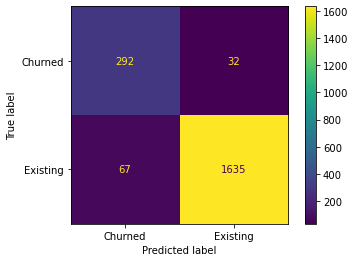

In [77]:
ConfusionMatrixDisplay.from_estimator(rfc1,
                       test_x,
                       test_y,
                       values_format = 'd',
                       display_labels = ['Churned', 'Existing'])

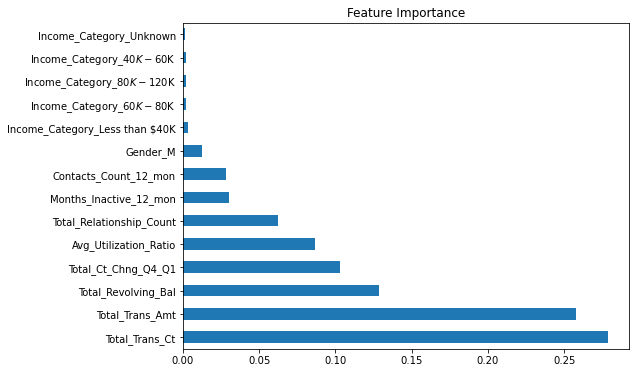

In [78]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rfc1.feature_importances_, index=train_x.columns).sort_values(ascending=False)

# Plot a simple bar chart
fig, ax = plt.subplots(figsize=(8,6))
feature_importances.plot.barh();
plt.title('Feature Importance')
plt.show()

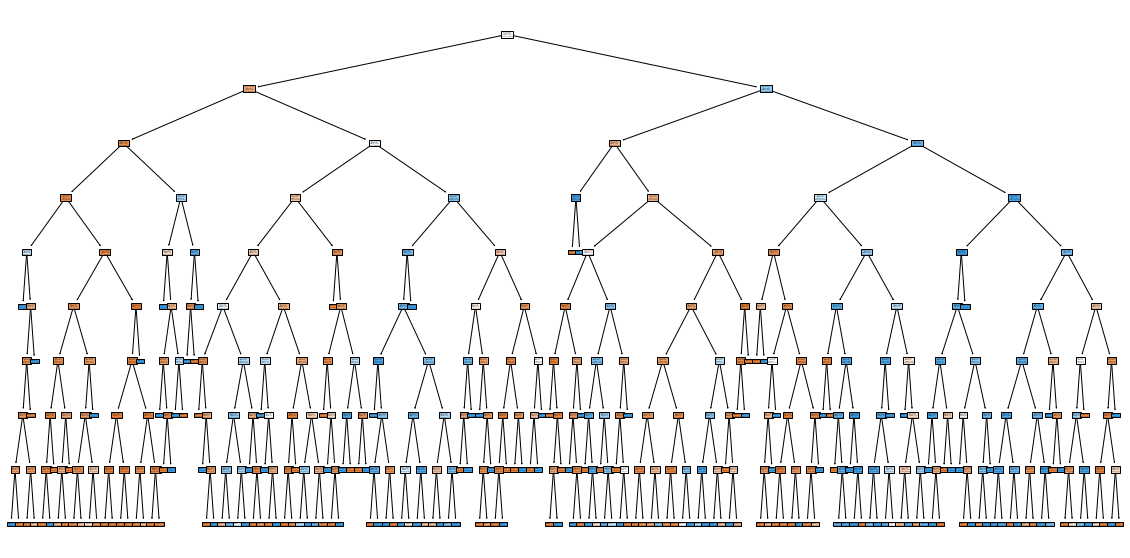

In [79]:
# using the fig
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

# tree 
plot_tree(rfc1.estimators_[0],
               filled = True);

# saving the decision tree
fig.savefig('rf_individualtree.png')